In [39]:
import pandas as pd
import numpy as np

Data=pd.read_csv('D:\\Stock_Anlysis\\btc_data.csv', parse_dates=['Date'] )

In [8]:
!pip install --upgrade yfinance
import yfinance as yf
import pandas as pd

def data_Ingestion():
    data = yf.download('BTC-USD', start='2014-09-17', end='2024-12-29')
    # data.to_csv('BTC.csv')
    return data

# Fetch data and print the first few rows
df = data_Ingestion()
print(df.head())


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[*********************100%***********************]  1 of 1 completed

Defaulting to user installation because normal site-packages is not writeable
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [7]:
import yfinance as yf
import pandas as pd

def data_Ingestion():
    ticker = yf.Ticker('BTC-USD')
    data = ticker.history(start='2014-09-17', end='2024-12-29')
    print(data.columns)  # Print columns to verify 'Adj Close' is present
    # data.to_csv('BTC.csv')
    return data

# Fetch data and print the first few rows
df = data_Ingestion()
print(df.head())

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0    

In [4]:
import yfinance as yf
import csv# Example for BTC
btc_data = yf.download('BTC-USD', start='1986-01-01', end='2024-11-28')
print(btc_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [3]:
Data['Date'].dtype

datetime64[ns, UTC]

In [43]:
Data['Date']= pd.to_datetime(Data['Date'])

In [44]:
Data['Date'].dtype

datetime64[ns, UTC]

In [47]:
Data.isna().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [48]:
Data.set_index('Date', inplace=True)

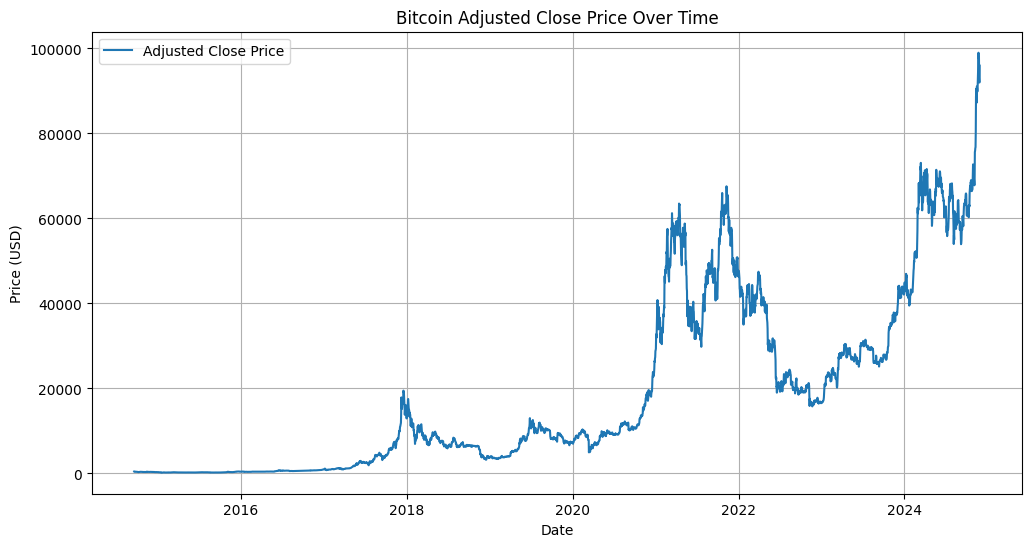

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Data.index,Data['Adj Close'], label='Adjusted Close Price')
# plt.plot(Data.index, Data['Adj Close '], label='Adjusted Close ')
plt.title('Bitcoin Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Split the data into train and test sets (80% train, 20% test as an example)
train_size = int(len(Data) * 0.8)
train_data = Data[:train_size]
test_data = Data[train_size:]


In [102]:
len(test_data)

745

'we have seasonality as trend and season are increasing and decreasing proportionally'

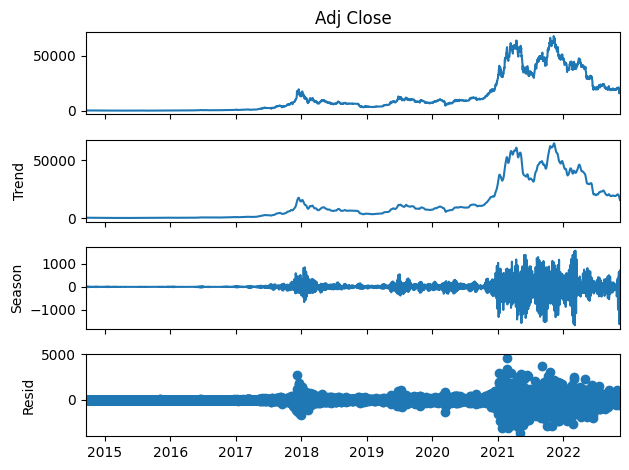

In [52]:
from statsmodels.tsa.seasonal import STL
stl_model=STL(train_data['Adj Close'])
result =stl_model.fit()
raw_residual= result.resid
result.plot()

'''we have seasonality as trend and season are increasing and decreasing proportionally'''


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(raw_residual, lags=30)
plot_pacf(raw_residual, lags=30)

In [ ]:
#Stationay test 

# from  statsmodels.tsa.seasonal import adfuller
from statsmodels.tsa.stattools import adfuller

test=adfuller(raw_residual)

print('This is the adf score ', test[0])
print( 'This  is the p-value', test[1])


In [54]:
train_data['Log_Adj_close']= np.log(train_data['Adj Close'])

C:\Users\Home\AppData\Local\Temp\ipykernel_10620\4199009327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Adj_close']= np.log(train_data['Adj Close'])


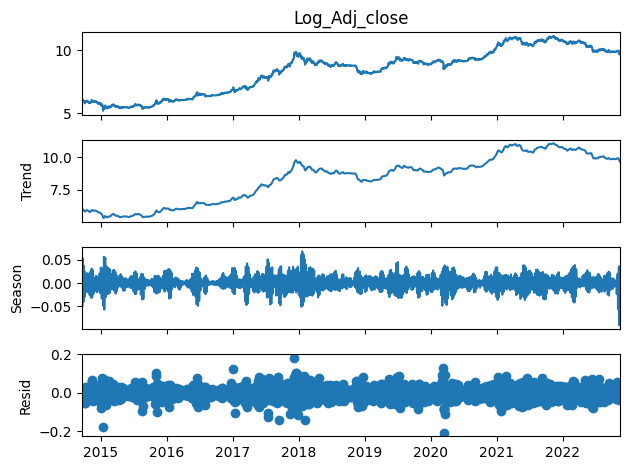

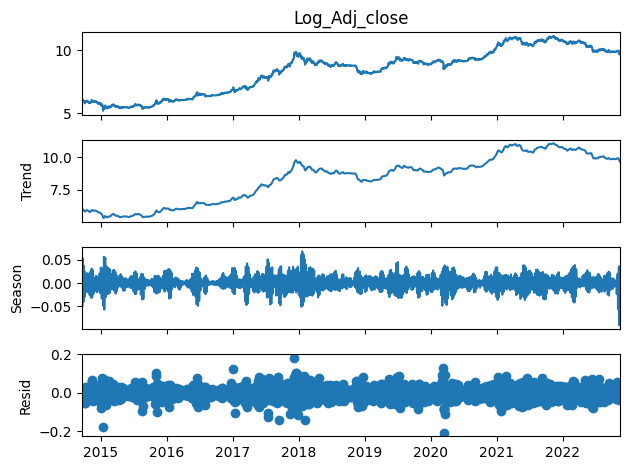

In [61]:
from statsmodels.tsa.seasonal import STL

st_model_after_log= STL(train_data['Log_Adj_close'])

fitted_model=st_model_after_log.fit()

log_residual=fitted_model.resid

fitted_model.plot()



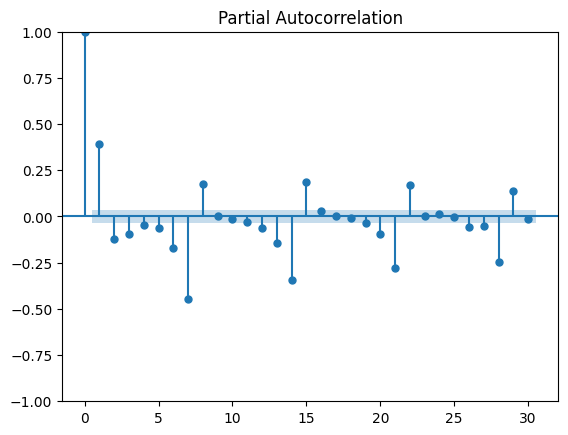

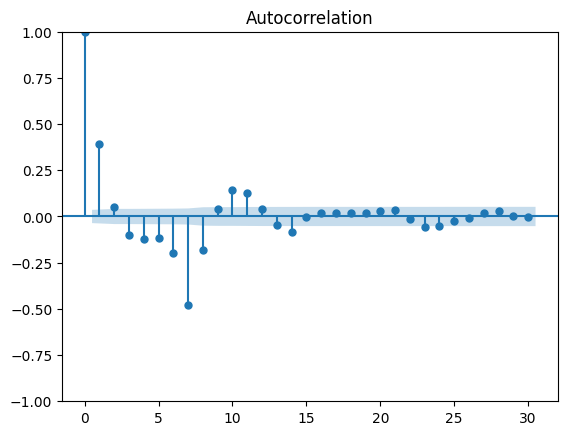

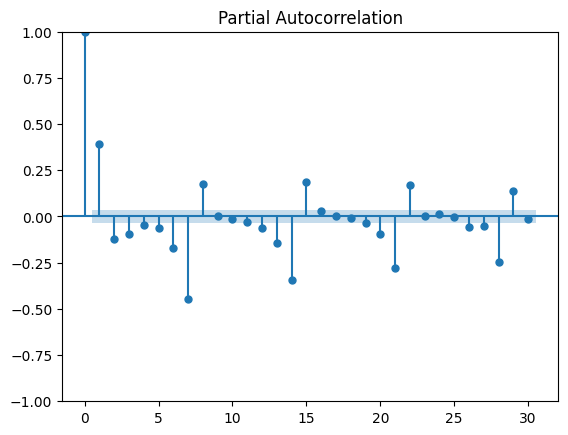

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(log_residual, lags=30)
plot_pacf(log_residual, lags=30)

In [70]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_residual)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -15.824975058425895
p-value: 1.0098319990075943e-28


In [71]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1, 0, 0)
model = ARIMA(log_residual, order=(1, 0, 0))
result = model.fit()

print(result.summary())


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 2980
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6836.318
Date:                Fri, 13 Dec 2024   AIC                         -13666.637
Time:                        12:17:13   BIC                         -13648.638
Sample:                    09-17-2014   HQIC                        -13660.160
                         - 11-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.388e-05      0.001      0.045      0.964      -0.001       0.001
ar.L1          0.3929      0.011     35.806      0.000       0.371       0.414
sigma2         0.0006   7.42e-06     80.238      0.0

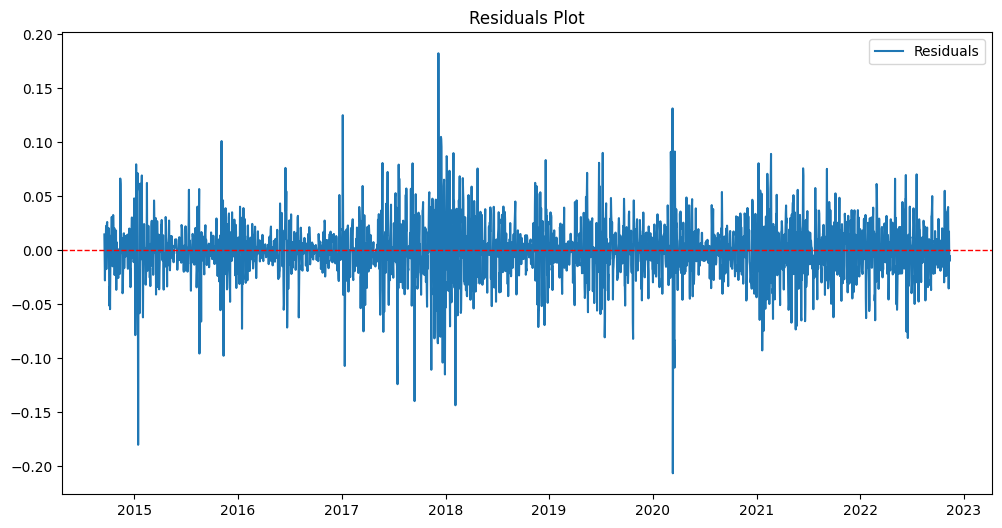

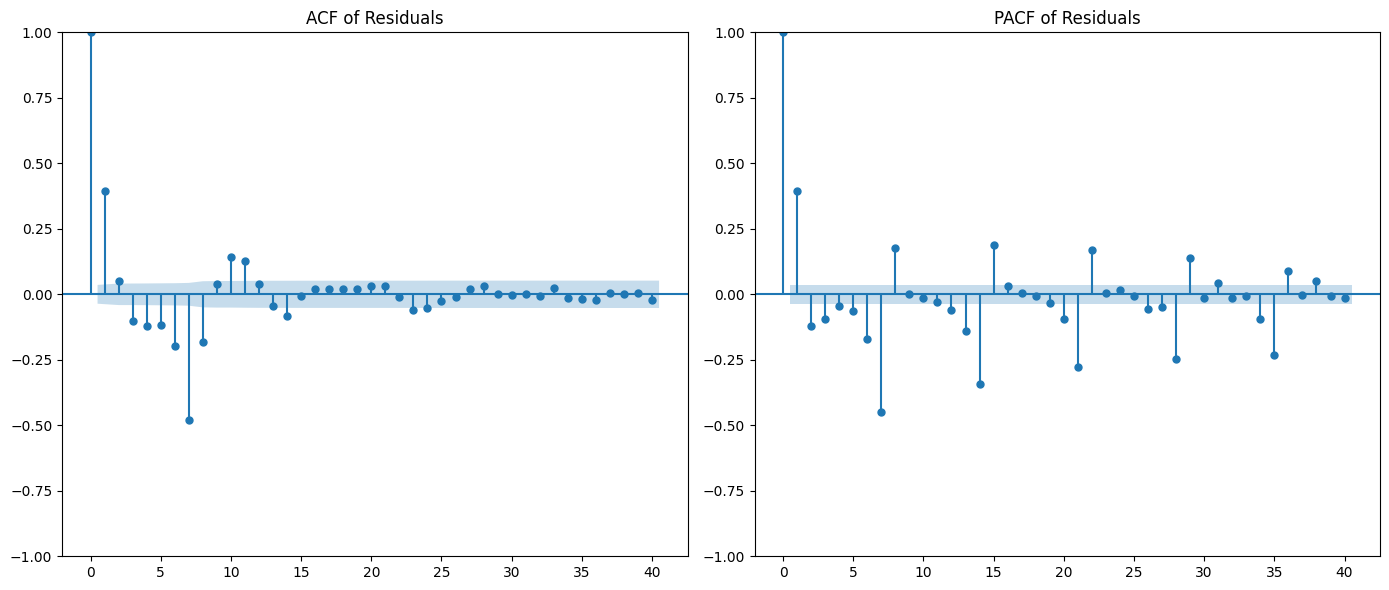

In [72]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract residuals
residuals = fitted_model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals Plot")
plt.legend()
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(residuals, ax=ax[0], lags=40, title="ACF of Residuals")
plot_pacf(residuals, ax=ax[1], lags=40, title="PACF of Residuals")
plt.tight_layout()
plt.show()


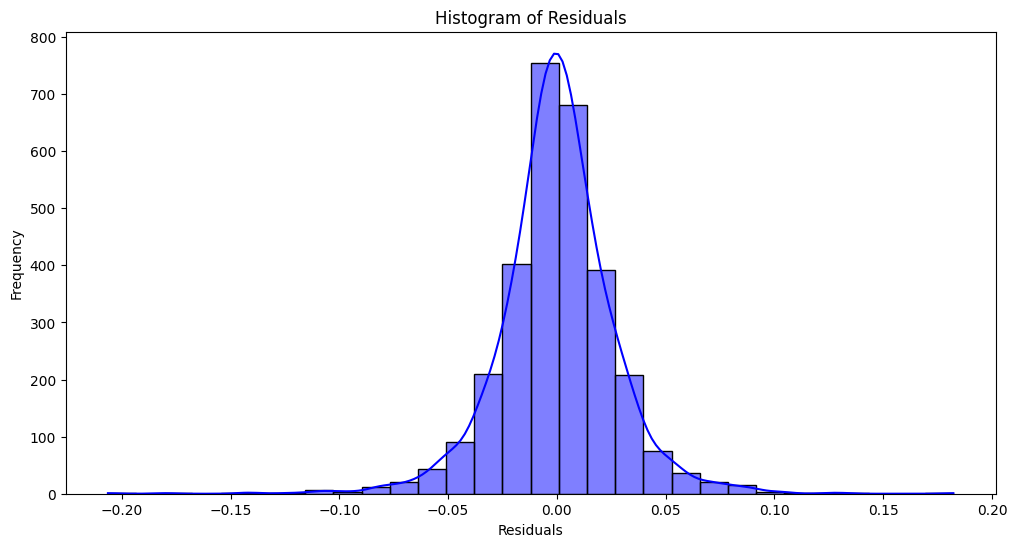

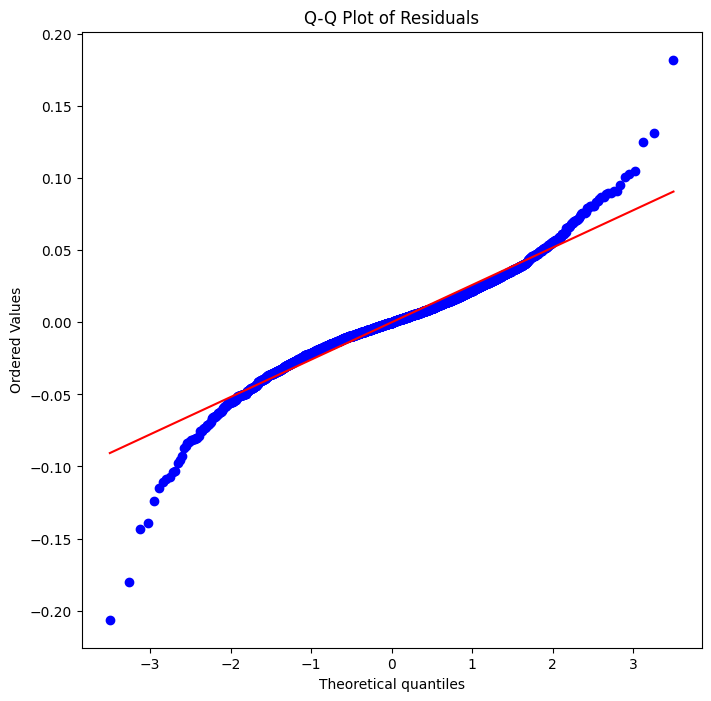

In [73]:
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [78]:
from scipy.stats import shapiro

stat, p = shapiro(log_residual)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Residuals are not normally distributed (Reject H0).")
else:
    print("Residuals are normally distributed (Fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.9535905647922982, p-value: 8.855980996903735e-30
Residuals are not normally distributed (Reject H0).


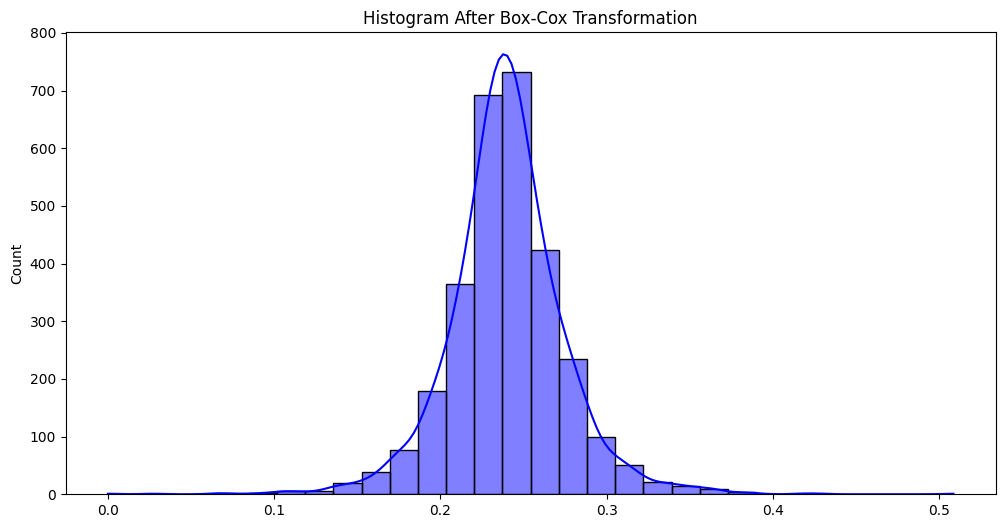

In [79]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (only for positive residuals)
transformed_residuals, _ = boxcox(residuals + abs(residuals.min()) + 1)

plt.figure(figsize=(12, 6))
sns.histplot(transformed_residuals, kde=True, bins=30, color="blue")
plt.title("Histogram After Box-Cox Transformation")
plt.show()


In [ ]:
# Identify outliers (z-score approach)
from scipy.stats import zscore
z_scores = zscore(residuals)
outliers = residuals[abs(z_scores) > 3]  # Threshold: |z| > 3

print("Number of outliers:", len(outliers))
print(outliers)

In [82]:
from scipy.stats import zscore

z_scores = zscore(log_residual)
outliers = abs(z_scores) > 3  # Common threshold
print(f"Number of Outliers (Z-Score > 3): {sum(outliers)}")


Number of Outliers (Z-Score > 3): 45


In [ ]:
import numpy as np

Q1 = np.percentile(log_residual, 25)
Q3 = np.percentile(log_residual, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (log_residual < lower_bound) | (log_residual > upper_bound)
print(f"Number of Outliers (IQR): {sum(outliers)}")




Number of Outliers (IQR): 147


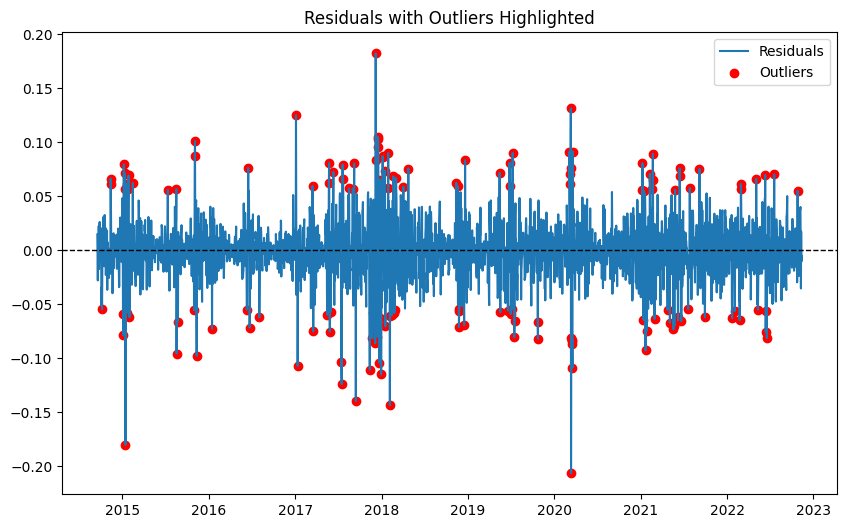

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(log_residual, label="Residuals")
plt.scatter(log_residual.index[outliers], log_residual[outliers], color='red', label="Outliers")
plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.legend()
plt.title("Residuals with Outliers Highlighted")
plt.show()


In [ ]:
# Identify time periods with outliers
outlier_periods = log_residual.index[outliers]
print("Outlier periods:", outlier_periods)

Outlier periods: DatetimeIndex(['2014-10-07 00:00:00+00:00', '2014-11-12 00:00:00+00:00',
               '2014-11-13 00:00:00+00:00', '2015-01-04 00:00:00+00:00',
               '2015-01-05 00:00:00+00:00', '2015-01-07 00:00:00+00:00',
               '2015-01-11 00:00:00+00:00', '2015-01-12 00:00:00+00:00',
               '2015-01-14 00:00:00+00:00', '2015-01-19 00:00:00+00:00',
               ...
               '2022-02-28 00:00:00+00:00', '2022-03-01 00:00:00+00:00',
               '2022-05-04 00:00:00+00:00', '2022-05-11 00:00:00+00:00',
               '2022-06-11 00:00:00+00:00', '2022-06-13 00:00:00+00:00',
               '2022-06-16 00:00:00+00:00', '2022-06-18 00:00:00+00:00',
               '2022-07-19 00:00:00+00:00', '2022-10-26 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=147, freq=None)
DatetimeIndex(['2014-10-07 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Date', freq=None)


In [100]:
from arch import arch_model

# Fit GARCH(1,1)
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit()
print(garch_fitted.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.9281287245806096e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 437504382.4741311
Iteration:      3,   Func. Count:     30,   Neg. LLF: 176309795596933.3
Iteration:      4,   Func. Count:     43,   Neg. LLF: 6.092048484439862e+16
Iteration:      5,   Func. Count:     55,   Neg. LLF: 27266413111.103603
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7055.449719120621
            Iterations: 6
            Function evaluations: 65
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7055.45
Distribution:                  Normal   AIC:                          -14102.9
Method:            Maximum 

C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007042. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Forecast
forecast = fitted_model.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(residuals[-100:], label="Observed")
plt.plot(range(len(residuals), len(residuals) + 10), forecast_mean, label="Forecast")
plt.fill_between(range(len(residuals), len(residuals) + 10),
                 forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("Forecast vs Observed")
plt.show()


AttributeError: 'DecomposeResult' object has no attribute 'forecast'

In [74]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)


Ljung-Box Test Results:
        lb_stat  lb_pvalue
10  1553.836615        0.0


In [35]:
train_data['Log_Adj_Close'] = np.log(Data['Adj Close'])

C:\Users\Home\AppData\Local\Temp\ipykernel_10620\466363694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Adj_Close'] = np.log(Data['Adj Close'])


C:\Users\Home\AppData\Local\Temp\ipykernel_10620\859879136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Trend'] = np.exp(result.trend)
C:\Users\Home\AppData\Local\Temp\ipykernel_10620\859879136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Season'] = np.exp(result.seasonal)
C:\Users\Home\AppData\Local\Temp\ipykernel_10620\859879136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

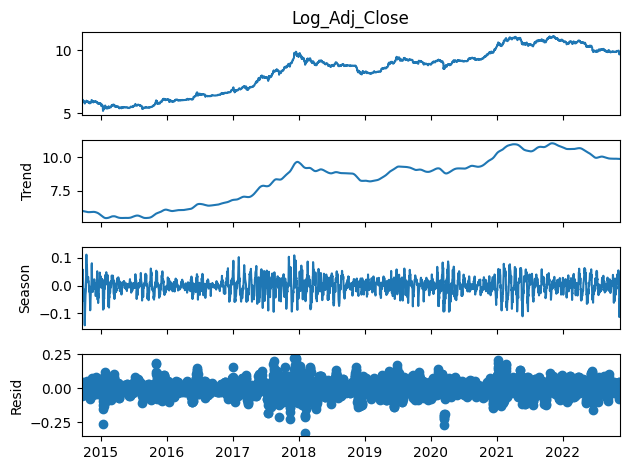

In [36]:
from statsmodels.tsa.seasonal import STL

# Apply STL on training data
stl_train = STL(train_data['Log_Adj_Close'], period=30)  # Adjust period as needed
result = stl_train.fit()

train_data['Log_Trend'] = np.exp(result.trend)
train_data['Log_Season'] = np.exp(result.seasonal)
train_data['Log_Residual'] = np.exp(result.resid)


# Extract residual component
residual_train = result.resid

# Plot the STL components (optional)
result.plot()
plt.show()


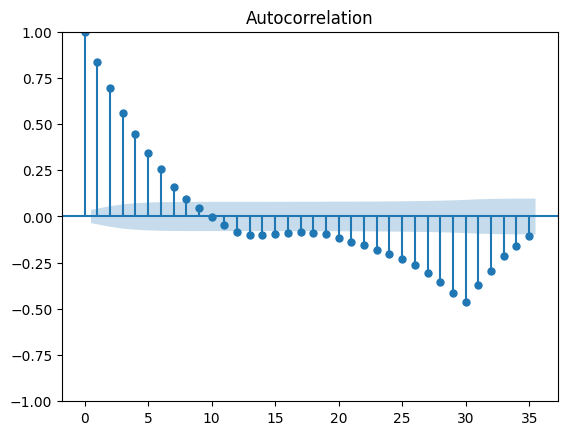

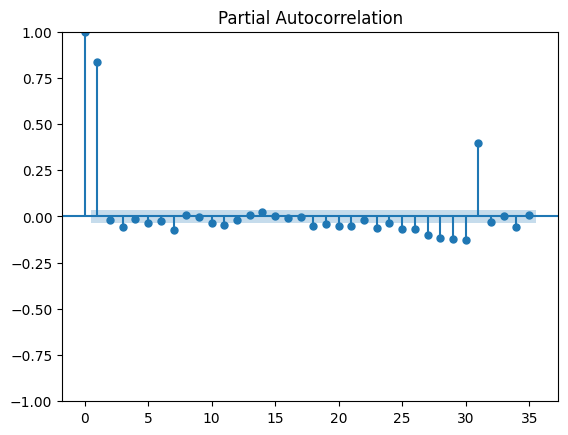

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for residuals
plot_acf(residual_train)
plt.show()

plot_pacf(residual_train)
plt.show()


In [38]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(residual_train)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

if adf_test[1] < 0.05:
    print("Residuals are stationary (Reject null hypothesis).")
else:
    print("Residuals are not stationary (Fail to reject null hypothesis).")


ADF Statistic: -19.595987784679473
p-value: 0.0
Residuals are stationary (Reject null hypothesis).


In [1]:
from statsmodels.tsa.arima.model import ARIMA

residual_train= ARIMA(residual_train, order=(0,0,1))
residual_model=residual_train.fit()
print('Thiss is the summary of data ',residual_model.summary())

NameError: name 'residual_train' is not defined

In [182]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: p=2, d=0, q=2 based on PACF and ACF)
residual_model = ARIMA(residual_train, order=(2, 0, 2))
residual_model_fit = residual_model.fit()

# Summary of the model
print(residual_model_fit.summary())


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 2980
Model:                 ARIMA(2, 0, 2)   Log Likelihood                6276.650
Date:                Mon, 09 Dec 2024   AIC                         -12541.300
Time:                        17:12:15   BIC                         -12505.302
Sample:                    09-17-2014   HQIC                        -12528.347
                         - 11-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.003     -0.036      0.971      -0.006       0.006
ar.L1          1.1982      0.240      4.996      0.000       0.728       1.668
ar.L2         -0.3251      0.198     -1.645      0.1

In [183]:
# Forecast residuals
forecast_residuals = residual_model_fit.forecast(steps=len(test_data))


In [187]:
test_data['Log_Adj_Close'] = np.log(Data['Adj Close'])

C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3875710492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Adj_Close'] = np.log(Data['Adj Close'])


In [188]:
# Apply STL on test data
stl_test = STL(test_data['Log_Adj_Close'], period=30)  # Use the same period as train_data
result_test = stl_test.fit()

test_data['Log_Trend'] = np.exp(result_test.trend)
test_data['Log_Season'] = np.exp(result_test.seasonal)
test_data['Log_Residual'] = np.exp(result_test.resid)


C:\Users\Home\AppData\Local\Temp\ipykernel_11144\2732075739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Trend'] = np.exp(result_test.trend)
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\2732075739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Season'] = np.exp(result_test.seasonal)
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\2732075739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
# Use train_data's trend and seasonality for test_data
test_data['Log_Trend'] = train_data['Log_Trend'].iloc[-1]  # Use last trend value
# test_data['Log_Season'] = train_data['Log_Season'].iloc[:len(test_data)].reset_index(drop=True)


C:\Users\Home\AppData\Local\Temp\ipykernel_11144\1775192571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Trend'] = train_data['Log_Trend'].iloc[-1]  # Use last trend value
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\1775192571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Season'] = train_data['Log_Season'].iloc[:len(test_data)].reset_index(drop=True)


In [219]:
dtt2= train_data['Log_Trend'].iloc[-1]

print(dtt2)

19216.49404162047


In [215]:
ddt=train_data['Log_Season'].iloc[:len(test_data)].reset_index(drop=True)

print(ddt)

0      1.134282
1      1.098208
2      1.049735
3      1.061635
4      1.038332
         ...   
740    1.000418
741    1.002713
742    0.999995
743    1.004887
744    0.996319
Name: Log_Season, Length: 745, dtype: float64


In [ ]:
print(train_data.columns)
print(test_data.columns)


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log_Adj_Close',
       'Log_Trend', 'Log_Season', 'Log_Residual'],
      dtype='object')
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log_Adj_Close',
       'Log_Trend', 'Log_Season', 'Log_Residual'],
      dtype='object')


In [210]:
train_data['Log_Trend'].iloc[-1]

19216.49404162047

In [191]:
test_data['Forecast_Log'] = (
    np.log(test_data['Log_Trend']) +
    np.log(test_data['Log_Season']) +
    forecast_residuals
)
test_data['Forecast'] = np.exp(test_data['Forecast_Log'])


C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3122636789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_Log'] = (
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3122636789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast'] = np.exp(test_data['Forecast_Log'])


In [200]:
test_data['Forecast_Log']

Date
2022-11-14 00:00:00+00:00   NaN
2022-11-15 00:00:00+00:00   NaN
2022-11-16 00:00:00+00:00   NaN
2022-11-17 00:00:00+00:00   NaN
2022-11-18 00:00:00+00:00   NaN
                             ..
2024-11-23 00:00:00+00:00   NaN
2024-11-24 00:00:00+00:00   NaN
2024-11-25 00:00:00+00:00   NaN
2024-11-26 00:00:00+00:00   NaN
2024-11-27 00:00:00+00:00   NaN
Name: Forecast_Log, Length: 745, dtype: float64

C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3118198638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Trend'] = np.exp(result.trend[-len(test_data):])  # Trend for the test period
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3118198638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Log_Season'] = np.exp(result.seasonal[-len(test_data):])  # Seasonal for the test period
C:\Users\Home\AppData\Local\Temp\ipykernel_11144\3118198638.py:9: SettingWithCopyWarning: 
A va

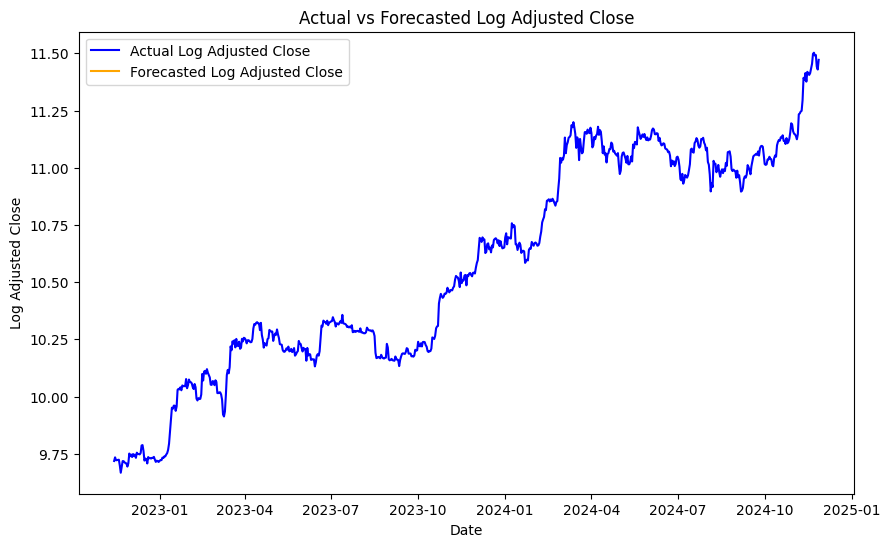

In [198]:
# Generate forecast on test data
forecast_residuals = residual_train[-len(test_data):]  # Match the length of test data

# Combine forecasted residuals with trend and seasonality for the forecast
test_data['Log_Trend'] = np.exp(result.trend[-len(test_data):])  # Trend for the test period
test_data['Log_Season'] = np.exp(result.seasonal[-len(test_data):])  # Seasonal for the test period

# Forecast the test data
test_data['Forecast_Log'] = np.log(test_data['Log_Trend'] + test_data['Log_Season'] + forecast_residuals)

# Convert back to original scale (from log scale)
test_data['Forecast'] = np.exp(test_data['Forecast_Log'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Log_Adj_Close'], label='Actual Log Adjusted Close', color='blue')
plt.plot(test_data.index, test_data['Forecast'], label='Forecasted Log Adjusted Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Log Adjusted Close')
plt.title('Actual vs Forecasted Log Adjusted Close')
plt.legend()
plt.show()


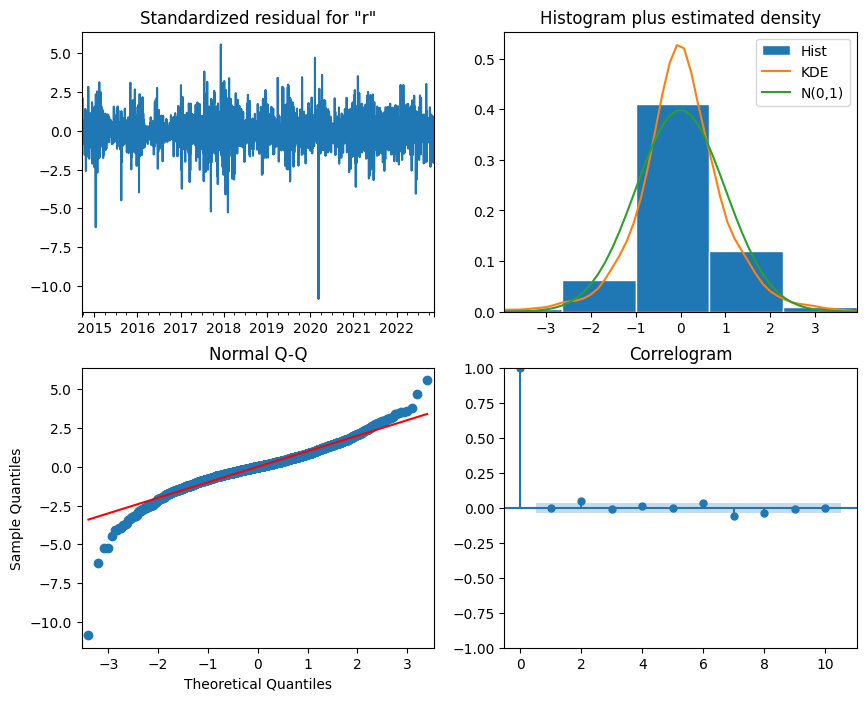

In [179]:
residual_fit.plot_diagnostics(figsize=(10, 8))
plt.show()


In [142]:
from statsmodels.tsa.stattools import adfuller

results=adfuller(residual_train)


print("ADF Test Results:")
print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print(f"   {key}: {value}")

ADF Test Results:
ADF Statistic: -18.80401515376208
p-value: 2.0227177748737732e-30
Critical Values:
   1%: -3.4325686438295246
   5%: -2.862520250798378
   10%: -2.567291814306234


In [143]:
from statsmodels.tsa.arima.model import ARIMA


# Fit ARIMA model on the residuals from the train data
arima_model_residuals = ARIMA(residual_train.dropna(), order=(1, 0, 1))  # Adjust ARIMA order if necessary
arima_model_residuals_fit = arima_model_residuals.fit()

# Forecast residuals for the test period
forecast_steps = len(test_data)  # Number of forecast steps equals the size of the test set
forecast_residuals = arima_model_residuals_fit.forecast(steps=forecast_steps)



C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [144]:
# Get the last trend value from the train data
last_trend_value = result_train.trend.dropna().iloc[-1]

# Extend the trend for the forecast steps (assuming constant trend)
forecast_trend = [last_trend_value] * forecast_steps

# Get the seasonal component (assume monthly seasonality, use the last part of the seasonal pattern)
seasonal_pattern = result_train.seasonal.dropna().tail(30).values
forecast_seasonality = np.tile(seasonal_pattern, forecast_steps // len(seasonal_pattern) + 1)[:forecast_steps]

In [117]:
print('this is the forecast trend', forecast_trend)
print('this is the seasonal pattern', seasonal_pattern)
print('this is the forecasr seasonality', forecast_seasonality)

this is the forecast trend [19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526497416, 19358.103526

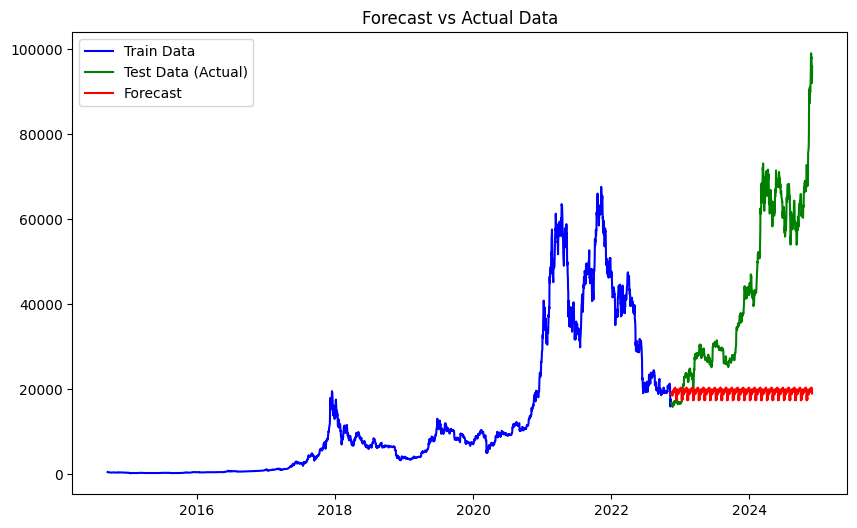

In [153]:
# Combine the forecasted residuals, trend, and seasonality
final_forecast = forecast_trend + forecast_seasonality + forecast_residuals

# print('This is the final forcast', final_forecast.isna())

# Create a DataFrame for the forecasted values (with the appropriate time index)
forecast_index = pd.date_range(test_data.index[0], periods=forecast_steps, freq='D')
# print('this is index of forecast', forecast_index)
# forecast_df = pd.DataFrame(final_forecast, index=forecast_index, columns=['Forecast'])

forecast_df= pd.DataFrame(final_forecast, index= forecast_index)

# forecast_df= pd.DataFrame(final_forecast)

# print(len(final_forecast).isna().sum())  # Length of forecast values
# print(len(forecast_index).isna().sum())

# Plot the historical data, train data, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Adj Close'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Adj Close'], label='Test Data (Actual)', color='green')
plt.plot(forecast_df.index, forecast_df['predicted_mean'], label='Forecast', color='red')
plt.legend()
plt.title('Forecast vs Actual Data')
plt.show()


In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_data['Adj Close'], forecast_df['predicted_mean'])
mse = mean_squared_error(test_data['Adj Close'], forecast_df['predicted_mean'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Absolute Error (MAE): 24234.36705875155
Mean Squared Error (MSE): 953366166.5898914
Root Mean Squared Error (RMSE): 30876.628160955195


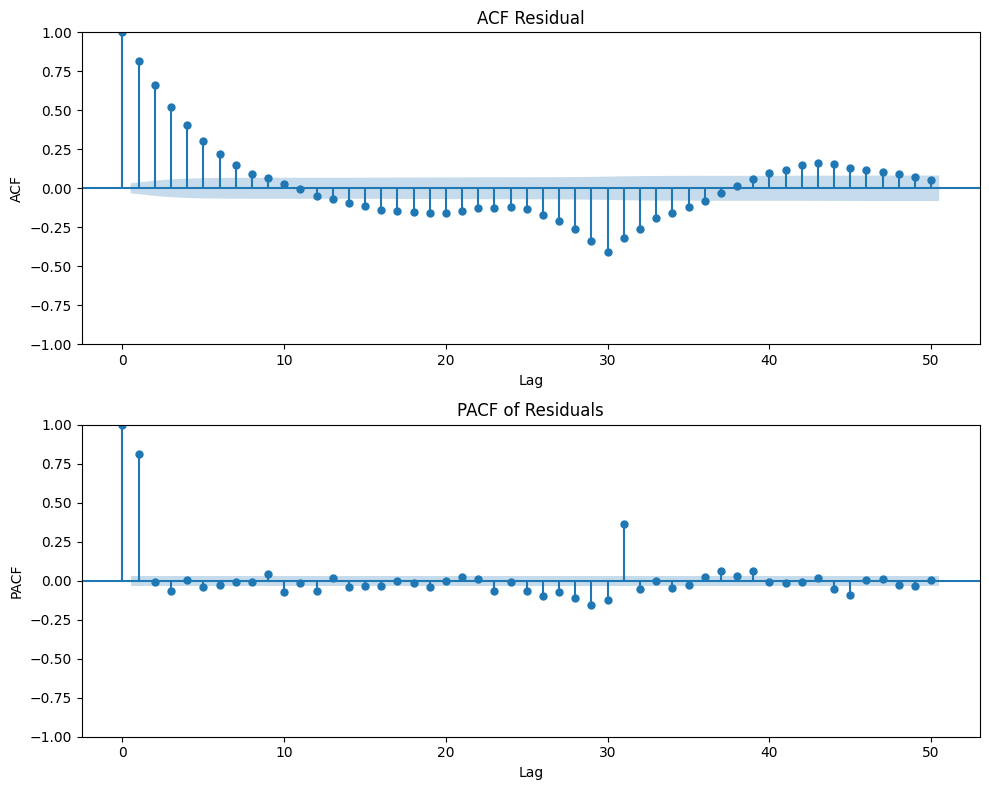

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig,ax= plt.subplots(2,1, figsize=(10,8))

plot_acf(residual,ax=ax[0], lags=50, title='ACF Residual')
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("ACF")

plot_pacf(residual, ax=ax[1], lags=50, method='ywm', title="PACF of Residuals")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("PACF")

plt.tight_layout()
plt.show()

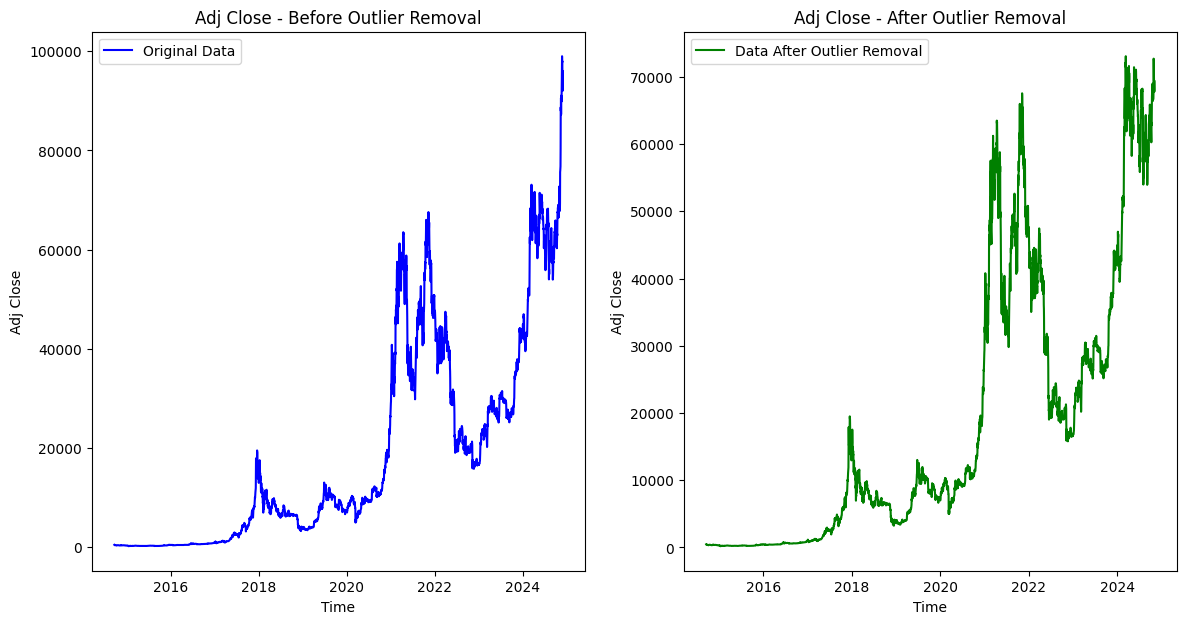

In [118]:
Q1 = Data['Adj Close'].quantile(0.25)
Q3 = Data['Adj Close'].quantile(0.75)
IQR = Q3 - Q1

# Filtering the data to remove outliers
df = Data[(Data['Adj Close'] >= (Q1 - 1.5 * IQR)) & (Data['Adj Close'] <= (Q3 + 1.5 * IQR))]

df_original = Data.copy()

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)  # Create subplot 1
plt.plot(df_original['Adj Close'], label='Original Data', color='blue')
plt.title('Adj Close - Before Outlier Removal')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()


plt.subplot(1, 2, 2)  # Create subplot 2
plt.plot(df['Adj Close'], label='Data After Outlier Removal', color='green')
plt.title('Adj Close - After Outlier Removal')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()





C:\Users\Home\AppData\Local\Temp\ipykernel_3048\852140624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Adj Close'] = np.log(df['Adj Close'])
C:\Users\Home\AppData\Local\Temp\ipykernel_3048\852140624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Adj Close Diff'] = df['Log Adj Close'].diff().dropna()


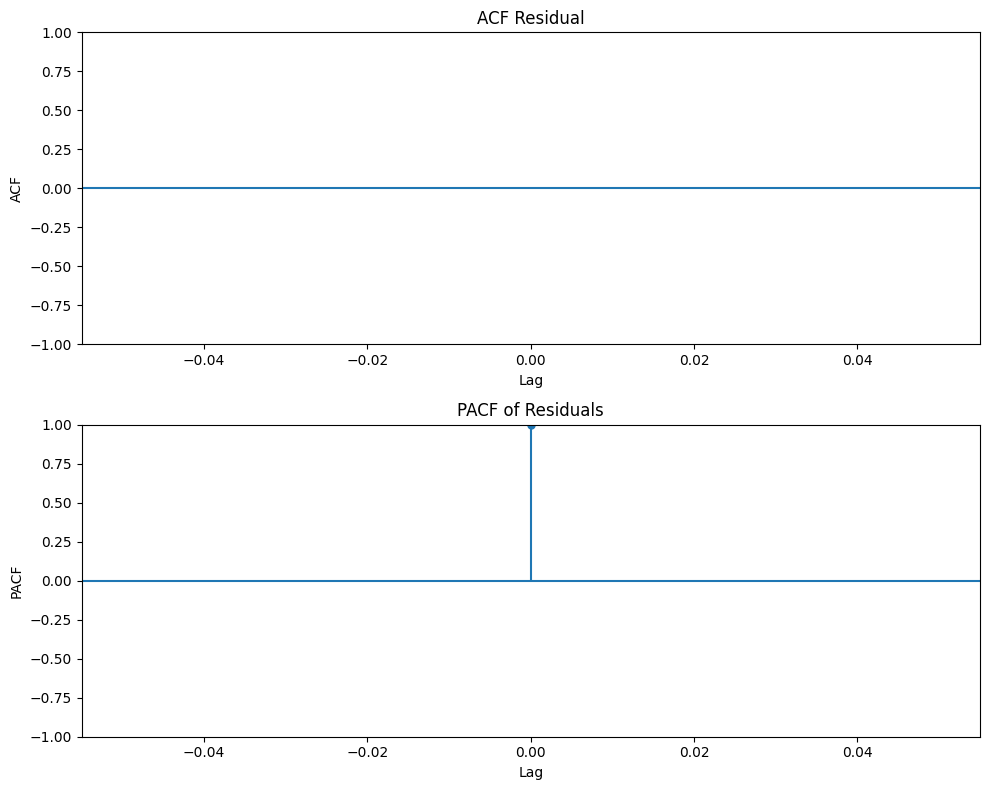

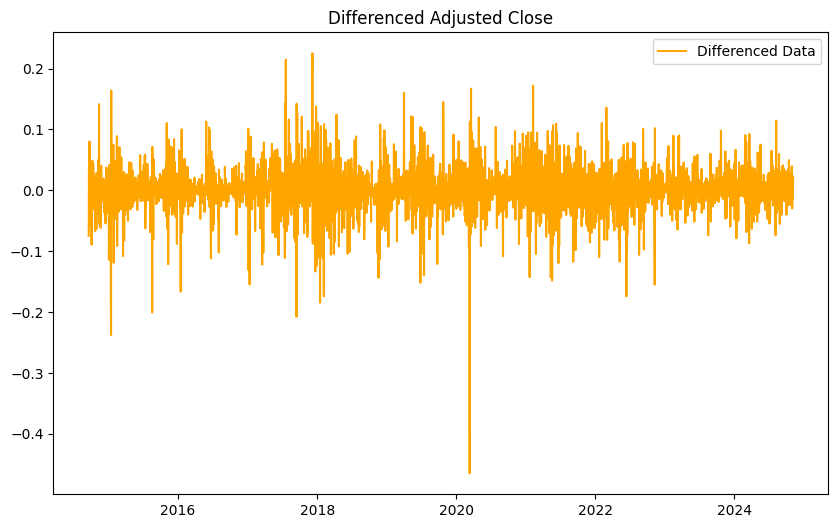

In [87]:
# df['Adj Close Diff'] = df['Adj Close'].diff().dropna()
# Log transformation (if needed)
df['Log Adj Close'] = np.log(df['Adj Close'])
df['Log Adj Close Diff'] = df['Log Adj Close'].diff().dropna()



from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig,ax= plt.subplots(2,1, figsize=(10,8))

plot_acf(df['Log Adj Close Diff'],ax=ax[0], lags=50, title='ACF Residual')
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("ACF")

plot_pacf(df['Log Adj Close Diff'], ax=ax[1], lags=50, method='ywm', title="PACF of Residuals")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("PACF")

plt.tight_layout()
plt.show()


# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['Log Adj Close Diff'], label='Differenced Data', color='orange')
plt.title('Differenced Adjusted Close')
plt.legend()
plt.show()

In [ ]:
result= adfuller(df['Log Adj Close Diff'].dropna())# only Non-zero kept

print('ADF stats', result[0])
print('p-Value', result[1])
print('Critaicl Values', result[4])

In [84]:
# ADF Test after differencing
result = adfuller(df['Log Adj Close Diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")


ADF Statistic: -18.52514079751728
p-value: 2.106376052442679e-30
Critical Values: {'1%': -3.4321224410657236, '5%': -2.8623231662354693, '10%': -2.5671868908001723}


In [105]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


train = df[:-30]
test = df[-30:]

# Fit the ARIMA model (with p=1, d=1, q=1)
model = ARIMA(train['Log Adj Close Diff'], order=(1, 1, 1))

# Fit the model
fitted_model = model.fit()

model_fit = fitted_model.resid

# Print the summary of the fitted model
print(fitted_model.summary())


# Make predictions on the test set
# y_pred = model_fit.get_forecast(steps=len(test)).predicted_mean

# # Evaluate the model performance
# mse = mean_squared_error(test['Adj Close'], y_pred)
# print(f'Mean Squared Error: {mse:.2f}')




C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Log Adj Close Diff   No. Observations:                 3673
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6915.898
Date:                Thu, 05 Dec 2024   AIC                         -13825.796
Time:                        16:57:28   BIC                         -13807.171
Sample:                    09-17-2014   HQIC                        -13819.165
                         - 10-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0237      0.010     -2.289      0.022      -0.044      -0.003
ma.L1         -0.9961      0.001   -753.643      0.000      -0.999      -0.994
sigma2         0.0013   1.23e-05    109.637      0.0

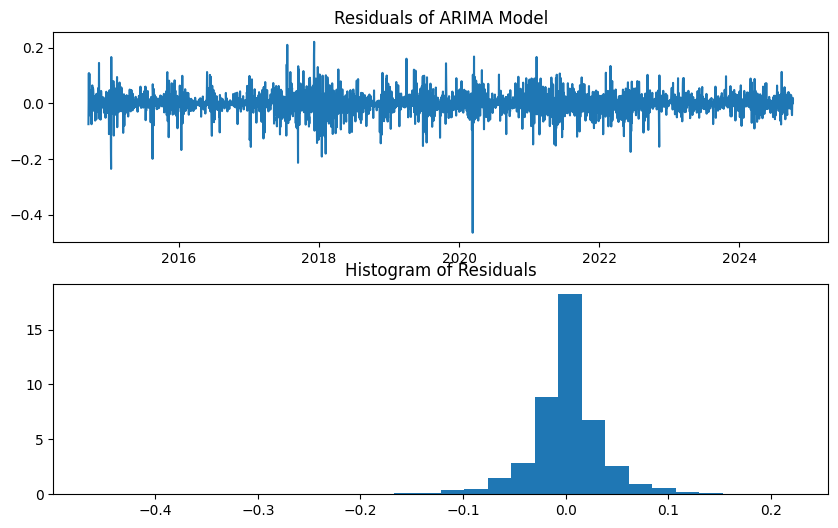

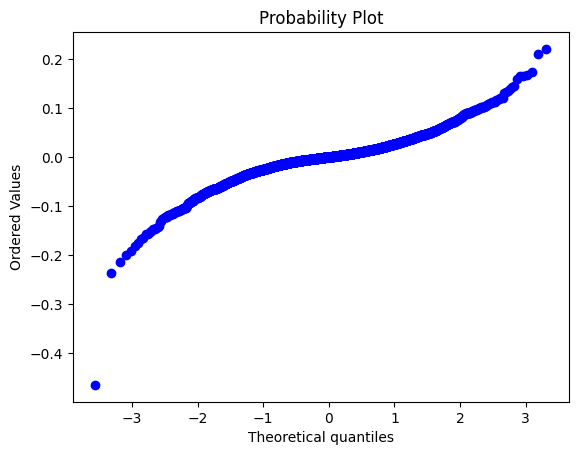

In [107]:
import matplotlib.pyplot as plt

# Residual diagnostics
residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.subplot(212)
plt.hist(residuals, bins=30, density=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


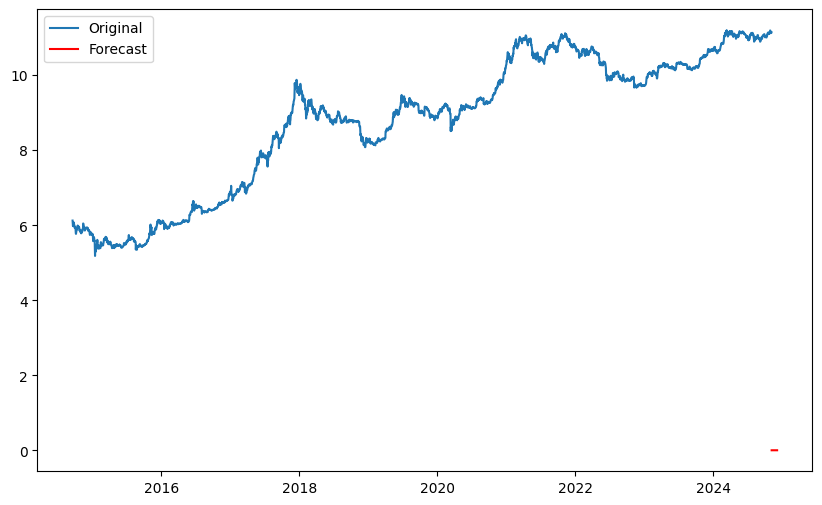

In [108]:
# Forecast for the next 30 periods (days)
forecast = fitted_model.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Log Adj Close'], label="Original")
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast, label="Forecast", color='red')
plt.legend()
plt.show()
